In [1]:
import cv2
import numpy as np

# 画像を読み込む
image = cv2.imread('../data/imgs/スクリーンショット 2023-11-17 14.03.21.png')

# グレースケールに変換
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ノイズを減らすためにガウシアンブラーを適用
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# エッジ検出を行う
edges = cv2.Canny(blurred_image, threshold1=100, threshold2=200)

# ネジの頭部を見つけるためのパラメータを設定
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100  # ネジの大きさに応じて調整
params.maxArea = 1000  # ネジの大きさに応じて調整

# Blob Detectorを作成
detector = cv2.SimpleBlobDetector_create(params)

# Blob（ネジの頭部）を検出
keypoints = detector.detect(edges)

# 検出されたネジの数を表示
print("Detected screws:", len(keypoints))

# 検出されたネジの位置にマークを付けた画像を作成
marked_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 結果の画像を表示
cv2.imshow('Detected Screws', marked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Detected screws: 1


In [3]:
import cv2

image_path = "../data/imgs/スクリーンショット 2023-11-17 14.03.21.png"

# 画像を読み込む
image = cv2.imread(image_path)

# グレースケールに変換
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ノイズを低減
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# エッジ検出
edges = cv2.Canny(blurred, 50, 150)

# 輪郭を見つける
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# 表示
cv2.imshow('Edges', edges)
cv2.waitKey(0)


48

In [2]:
import cv2
import numpy as np

# 8ビット1チャンネルのグレースケールとして画像を読み込む
img = cv2.imread("../data/imgs/スクリーンショット 2023-11-17 14.23.31.jpg", cv2.IMREAD_GRAYSCALE)

contours, hierarchy = cv2.findContours(
    img,
    cv2.RETR_EXTERNAL,      # 一番外側の輪郭のみを取得する
    cv2.CHAIN_APPROX_NONE   # 輪郭座標の省略なし
    )

# 画像表示用に入力画像をカラーデータに変換する
img_disp = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# 輪郭の点の描画
for i, contour in enumerate(contours):
    # 輪郭を描画
    cv2.drawContours(img_disp, contours, -1, (255, 255, 0), 3)

    # 傾いていない外接する矩形領域
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img_disp,(x,y),(x+w-1,y+h-1),(0,255,0),2)

    # 傾いた外接する矩形領域
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.intp(box)
    cv2.drawContours(img_disp,[box],0,(0,0,255), 2)

# 画像の表示
cv2.imshow("Image", img_disp)

# キー入力待ち(ここで画像が表示される)
cv2.waitKey()


113

: 

In [8]:
import cv2
import numpy as np

def rectangularity(contour):
    '''
    矩形度を求める

    Parameters
    ----------
    contour : ndarray
        輪郭の(x,y)座標の配列

    Returns
    -------
        矩形度

    '''
    # 面積
    area = cv2.contourArea(contour)
    # 傾いた外接する矩形領域
    _, (width, height), _ = cv2.minAreaRect(contour)

    # 矩形度を返す
    return area / width / height

# 8ビット1チャンネルのグレースケールとして画像を読み込む
img = cv2.imread("../data/imgs/スクリーンショット 2023-11-17 14.23.31.jpg", cv2.IMREAD_GRAYSCALE)
print(img.shape)

# 白黒反転して二値化
ret, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

# 一番外側の輪郭のみを取得
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )

# 画像表示用に入力画像をカラーデータに変換する
img_disp = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# 全ての輪郭を描画
cv2.drawContours(img_disp, contours, -1, (0, 0, 255), 2)

# 輪郭の点の描画
for contour in contours:
    # 傾いた外接する矩形領域の描画
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.intp(box)
    cv2.drawContours(img_disp,[box],0,(0,255,255), 1)
    # 矩形度の計算
    val = rectangularity(contour)
    # 輪郭の矩形領域
    x,y,w,h = cv2.boundingRect(contour)
    # 矩形度の描画
    cv2.putText(img_disp, f"{val:.3f}", (x, y-10), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 1, cv2.LINE_AA)
    # 円らしい領域（円形度が0.85以上）を囲う
    if val > 0.85:
        cv2.rectangle(img_disp,(x-10,y-10),(x+w+10,y+h+10),(255,0,0),2) # 少し外側を囲う

cv2.imshow("Image", img_disp)

# キー入力待ち(ここで画像が表示される)
cv2.waitKey()




(1398, 1038)


ZeroDivisionError: float division by zero

In [6]:
import cv2
import numpy as np

def extract_receipt(image_path, output_path='extracted_receipt.jpg'):
    # 画像を読み込む
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 画像のノイズを減らし、エッジを強調する
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 10, 300)

    # 輪郭を見つける
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 最大の輪郭を見つける（レシートと仮定）
    largest_contour = max(contours, key=cv2.contourArea)

    # 輪郭の点を抽出し、四角形を形成するために必要な点を見つける
    peri = cv2.arcLength(largest_contour, True)
    approx = cv2.approxPolyDP(largest_contour, 0.02 * peri, True)

    if len(approx) == 4:
        # 透視変換を行う
        rect = np.array(approx, dtype='float32')
        dst = np.array([[0, 0], [rect[1][0][0], 0], [rect[1][0][0], rect[2][0][1]], [0, rect[2][0][1]]], dtype='float32')
        M = cv2.getPerspectiveTransform(rect, dst)
        warped = cv2.warpPerspective(image, M, (int(rect[1][0][0]), int(rect[2][0][1])))

        # 結果を保存
        cv2.imwrite(output_path, warped)
        return output_path
    else:
        return "四角形の輪郭が見つかりませんでした。"

# デモ用にサンプル画像のパスを使用
sample_image_path = '../data/imgs/スクリーンショット 2023-11-17 14.23.31.jpg' # 実際には適切な画像パスを使用
extracted_image_path = extract_receipt(sample_image_path)
print(f"抽出されたレシートの画像は {extracted_image_path} に保存されました。")


error: OpenCV(4.8.1) /Users/runner/miniforge3/conda-bld/libopencv_1698890338329/work/modules/imgproc/src/smooth.dispatch.cpp:294: error: (-215:Assertion failed) ksize.width > 0 && ksize.width % 2 == 1 && ksize.height > 0 && ksize.height % 2 == 1 in function 'createGaussianKernels'


2023-11-17 15:03:25.638 python[45006:1041613] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


ValueError: cannot select an axis to squeeze out which has size not equal to one

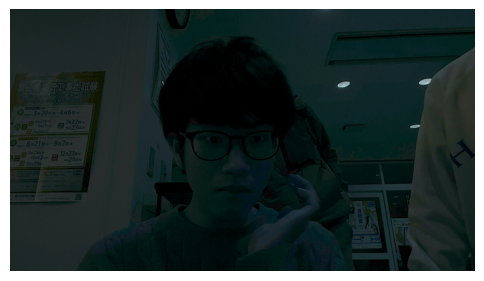

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

cam = cv2.VideoCapture(1)
_,img = cam.read()

lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, 0.5) * 255.0, 0, 255)
img_gamma = cv2.LUT(img, lookUpTable)

img_gray = cv2.cvtColor(img_gamma, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
_, img_binary= cv2.threshold(img_gray, 130, 255, cv2.THRESH_BINARY_INV)

contours = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]

def draw_contours(ax, img, contours):
    ax.imshow(img)
    ax.axis('off')
    for i, cnt in enumerate(contours):
        cnt = np.squeeze(cnt, axis=1)
        ax.add_patch(Polygon(cnt, color='b', fill=None, lw=2))
        ax.plot(cnt[:, 0], cnt[:, 1], 'ro', mew=0, ms=2)
        ax.text(cnt[0][0], cnt[0][1], i, color='b', size='20')

fig, ax = plt.subplots(figsize=(6, 6))
draw_contours(ax, img_gamma, contours)

for i, cnt in enumerate(contours):
    rect = cv2.minAreaRect(cnt)
    (cx, cy), (width, height), angle = rect
    rect_points = cv2.boxPoints(rect)
    ax.add_patch(Polygon(rect_points, color='g', fill=None, lw=2))

    if width<height:
        kei=int(width)
        nag=int(height)
    else:
        kei=int(height)
        nag=int(width)
    print('番号：',i)
    print('縦：',kei,'横',nag)
    L = 0
    if 44<=kei<=52:
        M = 3
    elif 55<=kei<=65:
        M = 4
    else:
        M = 0
    if M == 3 and 100>nag>80 or M == 4 and 110>nag>100:
        L = 8
    elif M == 3 and 78 >= nag >= 67 or M == 4 and 100 >= nag > 70:
        L = 5
    if M == 0:
        print('認識できませんでした')
    else:
        print('径：','M',M)
    if L == 0:
        nag = 11*nag/100-3
        L = int((nag + 4) / 5) * 5
    if M != 0:
        print('長さ：',L,'mm')

plt.show()
